#📌 Extracão

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [87]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

df = pd.read_json(url)


#🔧 Transformação

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [4]:
df_normalizado_customer = pd.json_normalize(df['customer'])
df_normalizado_customer

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3
...,...,...,...,...,...
7262,Female,0,No,No,13
7263,Male,0,Yes,No,22
7264,Male,0,No,No,2
7265,Male,0,Yes,Yes,67


In [5]:
df_normalizado_phone = pd.json_normalize(df['phone'])
df_normalizado_phone

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No
...,...,...
7262,Yes,No
7263,Yes,Yes
7264,Yes,No
7265,Yes,No


In [6]:
df_normalizado_internet = pd.json_normalize(df['internet'])
df_normalizado_internet

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No
...,...,...,...,...,...,...,...
7262,DSL,Yes,No,No,Yes,No,No
7263,Fiber optic,No,No,No,No,No,Yes
7264,DSL,No,Yes,No,No,No,No
7265,DSL,Yes,No,Yes,Yes,No,Yes


In [7]:
df_normalizado_account = pd.json_normalize(df['account'])
df_normalizado_account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [8]:
df_normalizado = pd.concat([
    df.drop(columns=['customer', 'phone', 'internet', 'account']),
    df_normalizado_customer.add_prefix('customer_'),
    df_normalizado_phone.add_prefix('phone_'),
    df_normalizado_internet.add_prefix('internet_'),
    df_normalizado_account.add_prefix('account_')
    ], axis=1)

In [10]:
df_normalizado['Churn'].unique()

array(['No', 'Yes', ''], dtype=object)

In [11]:
df_normalizado[df_normalizado['Churn'] == '']

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_OnlineBackup,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Monthly,account_Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


Inconsistência: 224 Dados Vazios
Substituidos por "Unknown"

In [12]:
df_normalizado['Churn'] = df_normalizado['Churn'].fillna('').str.strip().replace('', 'unknown')


In [13]:
df_normalizado['customer_gender'].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
df_normalizado['customer_SeniorCitizen'].unique()

array([0, 1])

In [15]:
df_normalizado['customer_Partner'].unique()

array(['Yes', 'No'], dtype=object)

In [16]:
df_normalizado['customer_Dependents'].unique()

array(['Yes', 'No'], dtype=object)

In [17]:
df_normalizado['customer_tenure'].unique()

array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 11, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14,
       35, 64, 39, 40,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 51, 31, 36,
       17, 18, 38, 42,  0])

In [18]:
df_tenure = df_normalizado[df_normalizado['customer_tenure'] > 0].copy()


Dataframe separado para eliminar os valores abaixo de 0 na tabela customer_tenure, facilitando assim os cálculos posteriormente.

In [19]:
df_normalizado['phone_PhoneService'].unique()

array(['Yes', 'No'], dtype=object)

In [20]:
df_normalizado['phone_MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [21]:
df_normalizado['internet_OnlineBackup'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [22]:
df_normalizado['internet_DeviceProtection'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [23]:
df_normalizado['internet_TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [24]:
df_normalizado['internet_StreamingTV'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [25]:
df_normalizado['internet_StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [26]:
df_normalizado['account_Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [27]:
df_normalizado['account_PaperlessBilling'].unique()

array(['Yes', 'No'], dtype=object)

In [28]:
df_normalizado['account_PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [29]:
df_normalizado['account_Charges.Monthly'].unique()

array([65.6 , 59.9 , 73.9 , ..., 91.75, 68.8 , 67.85])

In [30]:
df_normalizado['account_Charges.Monthly'].astype(str).str.strip().eq('').sum()

np.int64(0)

Sem cobrança?

In [31]:
df_normalizado['account_Charges.Total'].unique()

array(['593.3', '542.4', '280.85', ..., '742.9', '4627.65', '3707.6'],
      dtype=object)

In [32]:
df_normalizado['account_Charges.Total'].astype(str).str.strip().eq('').sum()

np.int64(11)

In [33]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_SeniorCitizen     7267 non-null   int64  
 4   customer_Partner           7267 non-null   object 
 5   customer_Dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_PhoneService         7267 non-null   object 
 8   phone_MultipleLines        7267 non-null   object 
 9   internet_InternetService   7267 non-null   object 
 10  internet_OnlineSecurity    7267 non-null   object 
 11  internet_OnlineBackup      7267 non-null   object 
 12  internet_DeviceProtection  7267 non-null   object 
 13  internet_TechSupport       7267 non-null   objec

A coluna account_Charges.Total está como string e deve ser alterada para Float por conter valores númericos.

In [35]:
df_normalizado['account_Charges.Total'] = df_normalizado['account_Charges.Total'].astype(str).str.strip()
df_normalizado['account_Charges.Total'].replace('', 'np.nan', inplace=True)

<ipython-input-35-1410674939>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_normalizado['account_Charges.Total'].replace('', 'np.nan', inplace=True)


In [36]:
col = df_normalizado['account_Charges.Total'].astype(str).str.strip()
col = col.replace(['', 'np.nan', 'NaN', 'nan'], np.nan)
df_normalizado['account_Charges.Total'] = pd.to_numeric(col, errors='coerce')

11 linhas com valor Vazio transformados em np.Nan

In [37]:
df_normalizado.drop('account_Charges.Daily', axis=1, inplace=True, errors='ignore')

contas_diarias = df_normalizado['account_Charges.Monthly'] / 30


pos = df_normalizado.shape[1] - 2

df_normalizado.insert(loc=pos, column='account_Charges.Daily', value=contas_diarias)
df_normalizado['account_Charges.Daily'] = df_normalizado['account_Charges.Daily'].round(2)
df_normalizado

,customerID,Churn,customer_gender,customer_SeniorCitizen,customer_Partner,customer_Dependents,customer_tenure,phone_PhoneService,phone_MultipleLines,internet_InternetService,...,internet_DeviceProtection,internet_TechSupport,internet_StreamingTV,internet_StreamingMovies,account_Contract,account_PaperlessBilling,account_PaymentMethod,account_Charges.Daily,account_Charges.Monthly,account_Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.19,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.00,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.46,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.27,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.84,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.68,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.26,67.85,4627.65


In [38]:
df_normalizado['Churn_binario'] = df_normalizado['Churn'].map({'Yes': 1, 'No': 0})

Transformando a coluna Churn em valores binários para facilitar o cálculo de evasões. Resolvi criar uma outra coluna para manter os dados originais.

In [39]:
df_normalizado['Customer_gender_binario'] = df_normalizado['customer_gender'].map({'Male': 1, 'Female': 0})

Transformando a coluna customer_gender em valores binários para facilitar o cálculo da média de gênero.

In [40]:
df_normalizado['customer_partner_binario'] = df_normalizado['customer_Partner'].map({'Yes' : 1, 'No': 0})

Transformando a coluna customer_Partner em valores binários para facilitar o cálculo da média de parceiros.

In [41]:
df_normalizado['customer_dependents_binario'] = df_normalizado['customer_Dependents'].map({'Yes' : 1, 'No': 0})

Transformando a coluna customer_Dependents em valores binários para facilitar o cálculo da média de dependentes.

In [42]:
df_normalizado['customer_phoneService_binario'] = df_normalizado['phone_PhoneService'].map({'Yes' : 1, 'No': 0})

Transformando a coluna phone_PhoneService em valores binários para facilitar o cálculo da média da quantidade de clientes com serviço telefônico.

In [43]:
df_normalizado['customer_paperless_binario'] = df_normalizado['account_PaperlessBilling'].map({'Yes' : 1, 'No': 0})

Transformando a coluna account_PaperlessBilling em valores binários para facilitar o cálculo da média da quantidade de clientes com Fatura digital

#📊 Carga e análise

# **Cálculo da média de evasões**

média da porcentagem de clientes que cancelaram: 26.54
média da porcentagem de clientes que NÃO cancelaram: 73.46


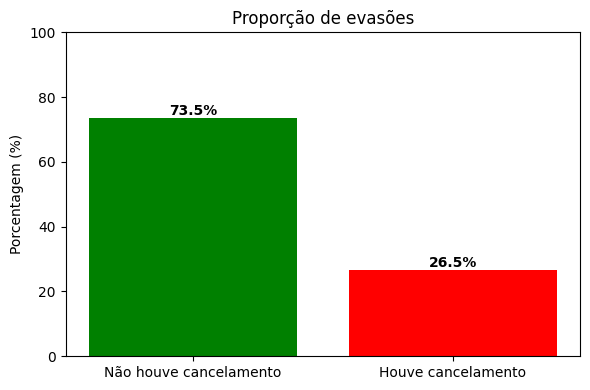

In [44]:
media_churn = df_normalizado['Churn_binario'].mean()*100
print(f'média da porcentagem de clientes que cancelaram: {media_churn:.2f}')

media_no = 100 - media_churn

print(f'média da porcentagem de clientes que NÃO cancelaram: {media_no:.2f}')

labels = ['Não houve cancelamento', 'Houve cancelamento']
valores = [media_no, media_churn]
cores = ['green', 'red']


plt.figure(figsize=(6, 4))
plt.bar(labels, valores, color=cores)

plt.title('Proporção de evasões')
plt.ylabel('Porcentagem (%)')
plt.ylim(0, 100)

for i, v in enumerate(valores):
    plt.text(i, v + 1, f"{v:.1f}%", ha='center', fontweight='bold')

plt.tight_layout()
plt.show()


Este dado indica que houve uma taxa de cancelamento de cerca de 27%. 27% de cancelamentos indica uma taxa muito alta, sendo necessário medidas para diminuir esta porcentagem.


# Cálculo da média de cobrança (Diária, mensal e total)

In [45]:
media_diaria = df_normalizado['account_Charges.Daily'].mean()
print(f'Média diária em R$: {media_diaria:.2f} ')

media_mensal = df_normalizado['account_Charges.Monthly'].mean()
print(f'Média mensal em R$: {media_mensal:.2f} ')

media_total = df_normalizado['account_Charges.Total'].mean()
print(f'Média total em R$: {media_total:.2f} ')


Média diária em R$: 2.16 
Média mensal em R$: 64.72 
Média total em R$: 2280.63 


Média de Gastos

Média diária em R$: 2.16

Média mensal em R$: 64.72

Média total em R$: 2280.63

Mediana e desvio padrão

In [46]:
colunas = ['account_Charges.Daily', 'account_Charges.Monthly', 'account_Charges.Total']
df_normalizado[colunas].describe().round(2)


,account_Charges.Daily,account_Charges.Monthly,account_Charges.Total
count,7267.00,7267.00,7256.00
mean,2.16,64.72,2280.63
std,1.00,30.13,2268.63
min,0.61,18.25,18.80
25%,1.18,35.42,400.22
50%,2.34,70.30,1391.00
75%,3.00,89.88,3785.30
max,3.96,118.75,8684.80


# Perfil dos clientes

In [47]:
media_idosos = df_normalizado['customer_SeniorCitizen'].mean()
print(f'Proporção de clientes idosos: {media_idosos:.2%}')

media_male = df_normalizado['Customer_gender_binario'].mean()
print(f'Proporção de clientes Homens: {media_male:.2%}')

media_female = 1 - media_male
print(f'Proporção de clientes Mulheres: {media_female:.2%}')

media_partner = df_normalizado['customer_partner_binario'].mean()
print(f'Proporção de clientes com parceiro(a): {media_partner:.2%}')

media_dependents = df_normalizado['customer_dependents_binario'].mean()
print(f'Proporção de clientes com dependentes: {media_dependents:.2%}')

media_phoneService = df_normalizado['customer_phoneService_binario'].mean()
print(f'Proporção de clientes com serviço telefônico: {media_phoneService:.2%}')

media_paperless = df_normalizado['customer_paperless_binario'].mean()
print(f'Proporção de clientes com fatura digital: {media_paperless:.2%}')



Proporção de clientes idosos: 16.27%
Proporção de clientes Homens: 50.57%
Proporção de clientes Mulheres: 49.43%
Proporção de clientes com parceiro(a): 48.41%
Proporção de clientes com dependentes: 30.01%
Proporção de clientes com serviço telefônico: 90.27%
Proporção de clientes com fatura digital: 59.32%


51% dos clientes são Homens

49% dos clientes são mulheres

Sendo que 16% do clientes são idosos

48% possuem parceiro(a)

30% possuem dependentes

90% Possuem serviço telefônico

59% utilizam fatura digital




# Tempo de fidelidade dos clientes

Média de tempo de contrato: 32.3 Meses
Mediana de tempo de contrato: 29.0 Meses
Valor máximo: 72.0 Meses
Valor minimo: 1.0 Meses


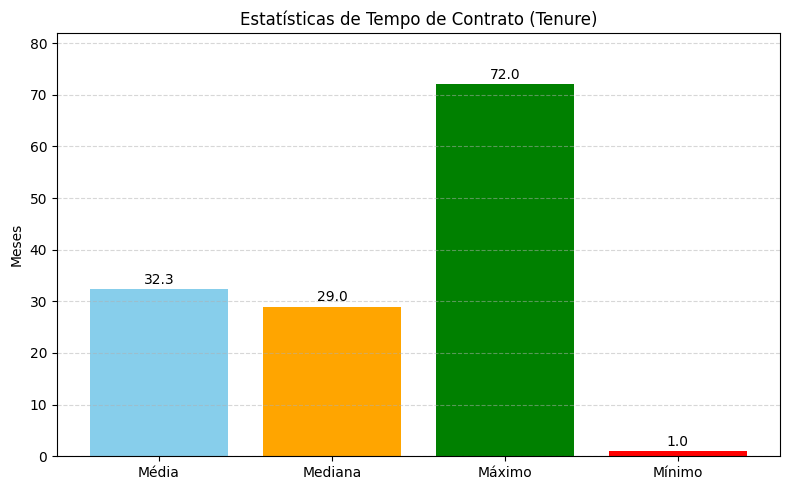

In [48]:
media_tenure = df_normalizado['customer_tenure'].mean()
print(f'Média de tempo de contrato: {media_tenure:.1f} Meses')

mediana_tenure = df_normalizado['customer_tenure'].median()
print(f'Mediana de tempo de contrato: {mediana_tenure:.1f} Meses')

max_tenure = df_normalizado['customer_tenure'].max()
print(f'Valor máximo: {max_tenure:.1f} Meses')

min_tenure = df_tenure['customer_tenure'].min()
print(f'Valor minimo: {min_tenure:.1f} Meses')


metricas = ['Média', 'Mediana', 'Máximo', 'Mínimo']
valores = [media_tenure, mediana_tenure, max_tenure, min_tenure]


plt.figure(figsize=(8, 5))
plt.bar(metricas, valores, color=['skyblue', 'orange', 'green', 'red'])
plt.ylabel('Meses')
plt.title('Estatísticas de Tempo de Contrato (Tenure)')
plt.ylim(0, max(valores) + 10)


for i, v in enumerate(valores):
    plt.text(i, v + 1, f'{v:.1f}', ha='center', fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



A média de tempo de contrato dos clientes é de aproximadamente 32 meses.

A mediana de tempo de contrato dos clientes é de 29 meses.

O maior contrato é de 72 meses e o menor, de 1 mês (excluindo os que iniciaram agora, ou que tem menos de 1 mês de contrato).

# Relação das evasões (Churn) com o gênero do cliente (Gender)

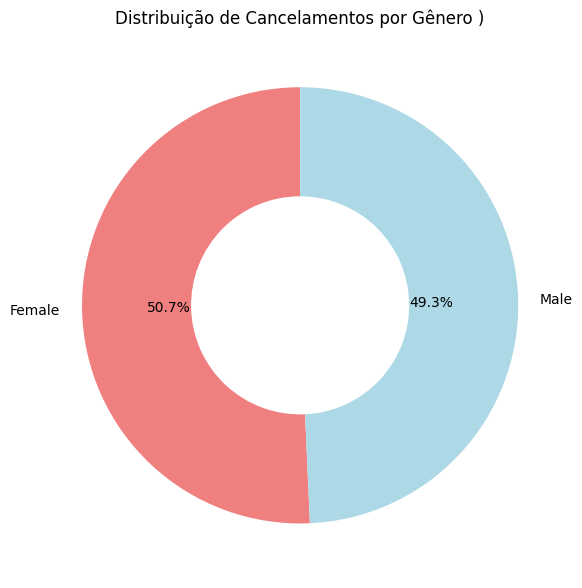

In [68]:
customer_churn_gender = df_normalizado.groupby('customer_gender')['Churn_binario'].mean() * 100

plt.figure(figsize=(6, 6))
plt.pie(
    customer_churn_gender.values,
    labels=customer_churn_gender.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['lightcoral','lightblue' ],
    wedgeprops=dict(width=0.5)
)
plt.title('Distribuição de Cancelamentos por Gênero )')
plt.tight_layout()
plt.show()

O gráfico indica um equilibrio de evasões em relação ao gênero porém as mulheres têm uma tendência maior em cancelar o serviço. Neste caso, estratégias de marketing direcionadas às mulheres são recomendadas, para assim evitar mais evasões no futuro.

# Relação das evasões (Churn) com o Tipo de contrato

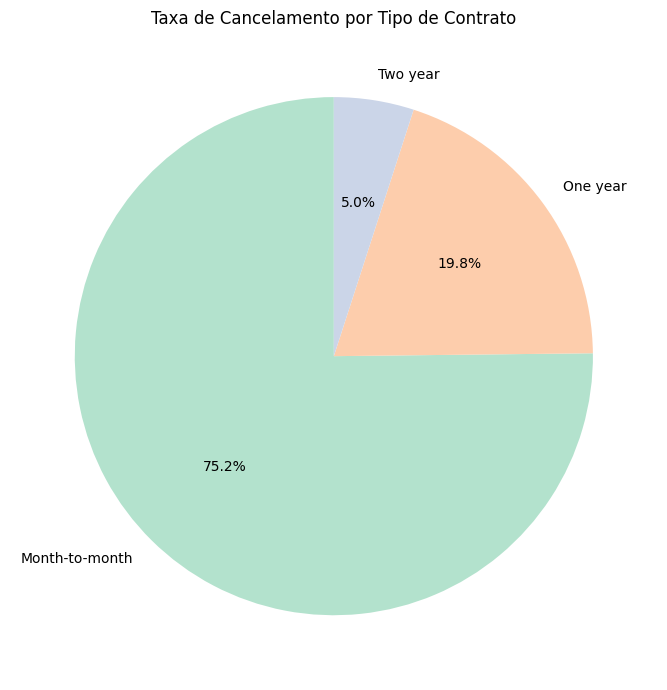

In [73]:
customer_churn_account = df_normalizado.groupby('account_Contract')['Churn_binario'].mean() * 100

plt.figure(figsize=(7, 7))
plt.pie(
    customer_churn_account.values,
    labels=customer_churn_account.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.Pastel2.colors
)

plt.title('Taxa de Cancelamento por Tipo de Contrato')
plt.tight_layout()
plt.show()



O gráfico demonstra que os contratos do tipo mês a mês ( Month to month) são mais propensos a cancelamentos. Redução na fatura mensal e incentivo a contratos mais longos, como os de um ano e dois anos são recomendados para evitar as evasões.

# Relação das  (Churn)  com o Método de pagamento (Payment Method)

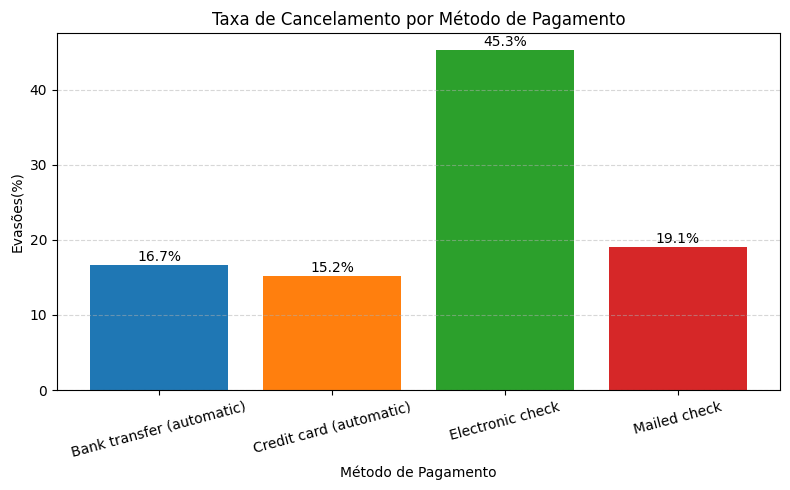

In [81]:
customer_churn_payment = df_normalizado.groupby('account_PaymentMethod')['Churn_binario'].mean() * 100

cores = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']

plt.figure(figsize=(8, 5))
bars = plt.bar(customer_churn_payment.index, customer_churn_payment.values, color=cores)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.1, f'{altura:.1f}%', ha='center', va='bottom')

plt.title('Taxa de Cancelamento por Método de Pagamento')
plt.ylabel('Evasões(%)')
plt.xlabel('Método de Pagamento')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O gráfico indica que método de pagamento de Cheque Eletrônico (Eletronic check) é responsável pela maior taxa de cancelamentos. Neste caso, recomenda-se o incentivo ao uso da transferência bancária, como a de débito automático e/ou o uso de cartão de crédito. Como já se trata de um método eletrônico, a troca do cheque por umas destas outras duas opções não alteraria drasticamente a forma de pagamento do cliente. Em último caso, e caso o cliente prefira um pagamento físico, é recomendada a opção de envio por correio.

# **Relação das Evasões com o Serviço de Internet oferecido**

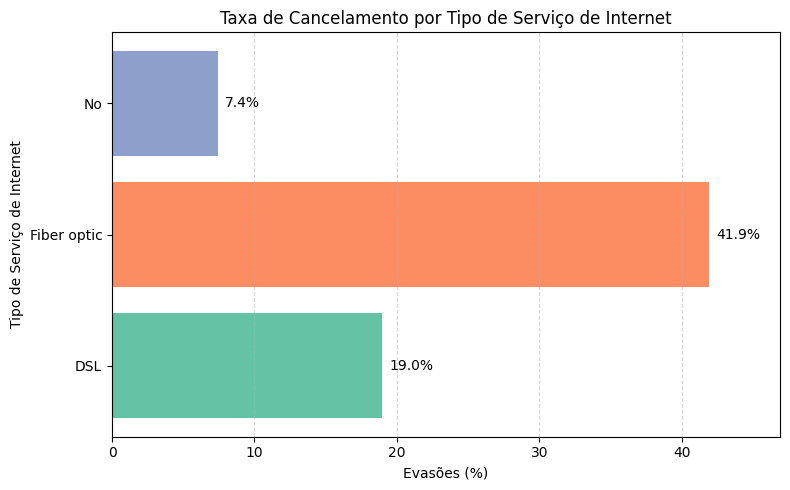

In [86]:

customer_churn_internet = df_normalizado.groupby('internet_InternetService')['Churn_binario'].mean() * 100

cores = ['#66c2a5', '#fc8d62', '#8da0cb']

plt.figure(figsize=(8, 5))
bars = plt.barh(customer_churn_internet.index, customer_churn_internet.values, color=cores)

for bar in bars:
    largura = bar.get_width()
    plt.text(largura + 0.5, bar.get_y() + bar.get_height()/2, f'{largura:.1f}%', va='center')

plt.xlim(0, customer_churn_internet.max() + 5)

plt.title('Taxa de Cancelamento por Tipo de Serviço de Internet')
plt.xlabel('Evasões (%)')
plt.ylabel('Tipo de Serviço de Internet')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

O gráfico indica que o serviço de Fibra ótica é o que mais possui cancelamentos. Neste caso, é necessário uma análise aprofundada no modo com o que o serviço está sendo oferecido, e utilizando-se de feedbacks dos clientes, aplicar melhorias neste serviço.

# Relação do tempo de contrato (Tenure) com as evasões (Churn)


<ipython-input-49-675086796>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn_binario', y='customer_tenure', palette=palette)


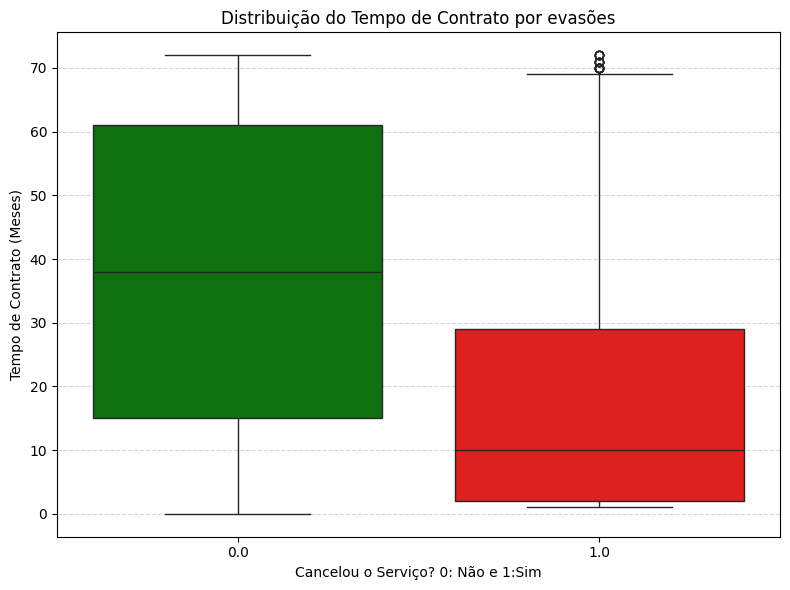

In [49]:
plt.figure(figsize=(8, 6))

palette = {'0.0': 'green', '1.0': 'red'}
sns.boxplot(data=df_normalizado, x='Churn_binario', y='customer_tenure', palette=palette)

plt.title('Distribuição do Tempo de Contrato por evasões')
plt.xlabel('Cancelou o Serviço? 0: Não e 1:Sim')
plt.ylabel('Tempo de Contrato (Meses)')
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

Na comparação entre o tempo de contrato e as evasões nota-se que os clientes
que mais cancelaram são os que geralmente tem o menor tempo de contrato, indicando uma **necessidade de uma estratégia inicial de retenção para evitar que os novos clientes cancelem o contrato.**


# Relação das evasões (Churn) com a cobrança das faturas (diárias, mensais e totais)

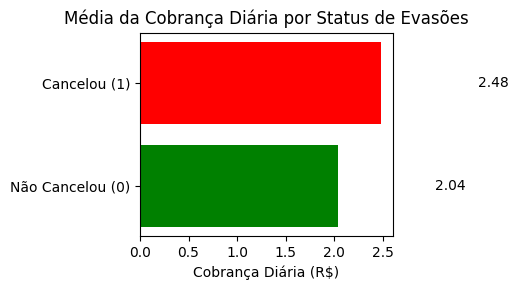

In [50]:

media_daily = df_normalizado.groupby('Churn_binario')['account_Charges.Daily'].mean()
cores = ['green', 'red']
labels = ['Não Cancelou (0)', 'Cancelou (1)']

plt.figure(figsize=(6,3))
plt.barh(labels, media_daily.values, color=cores)
for i, v in enumerate(media_daily.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10)
plt.title('Média da Cobrança Diária por Status de Evasões')
plt.xlabel('Cobrança Diária (R$)')
plt.tight_layout()
plt.show()




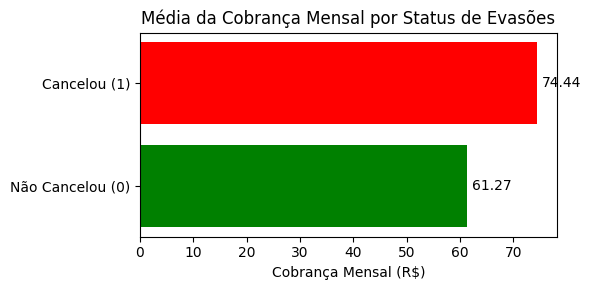

In [51]:
media_monthly = df_normalizado.groupby('Churn_binario')['account_Charges.Monthly'].mean()
cores = ['green', 'red']
labels = ['Não Cancelou (0)', 'Cancelou (1)']

plt.figure(figsize=(6,3))
plt.barh(labels, media_monthly.values, color=cores)
for i, v in enumerate(media_monthly.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10)
plt.title('Média da Cobrança Mensal por Status de Evasões')
plt.xlabel('Cobrança Mensal (R$)')
plt.tight_layout()
plt.show()

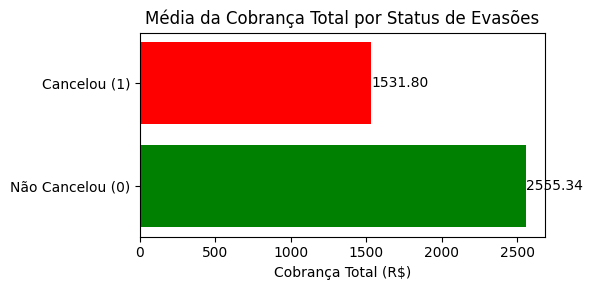

In [52]:
media_total = df_normalizado.groupby('Churn_binario')['account_Charges.Total'].mean()
cores = ['green', 'red']
labels = ['Não Cancelou (0)', 'Cancelou (1)']

plt.figure(figsize=(6,3))
plt.barh(labels, media_total.values, color=cores)
for i, v in enumerate(media_total.values):
    plt.text(v + 1, i, f"{v:.2f}", va='center', fontsize=10)
plt.title('Média da Cobrança Total por Status de Evasões')
plt.xlabel('Cobrança Total (R$)')
plt.tight_layout()
plt.show()

Após análise da relação das evasões com os tipos de cobrança, fica claro que há uma maior probabilidade de cancelamentos relacionados com os **valores mensais mais altos.**

Os valores diários também influenciam, porém o valor mensal tem maior impacto.

Já o valor Total é menor para quem cancelou, pois acumulam menos tempo no serviço

#📄Relatorio Final

# **Telecom X - Análise de Evasão de Clientes**

A Telecom está passando por problemas no grande aumento de evasões de clientes e este projeto teve como objetivo demonstrar maneiras de evitar estas evasões (churn) buscando formas de entender quais foram os motivos que influenciaram esta decisão. Após a análise dos dados de diversas váriaveis, foram identificados fatores predominantes que possivelmente foram a razão destas evasões.

Neste projeto foi utilizada a linguagem de programação Python e suas bibliotecas para analisar os dados, extrair as informações e aplicá-las nas tomadas de decisões.

# **Extração dos Dados**
Os dados foram extraidos através de uma API em formato JSON

# **Análise do Dataset e o tratamento das inconsistências**
Após observar os dados do Dataset, foi preciso normalizar as tabelas que estavam aninhadas. Normalizei cada uma das colunas e inseri cada uma delas em dataframes diferentes para facilitar suas leituras. Após normaliza-las, juntei-as a tabela original com o pd.concat. Depois de concatená-las observei cada uma das colunas em busca de inconsistência nos dados;

*   Encontrei na tabela 'Churn' 224 linhas sem valor, alterando-as para "Unknown'
*  Coluna account_Charges.Monthly: Alteração no tipo da coluna para Float64, possibilitando a manipulação dos valores. Alterei também os 11 valores que estavam vazios, tornando-os NaN com a importação da Biblioteca Numpy.

*   Dataframe separado para eliminar os valores abaixo de 0 na tabela customer_tenure, facilitando assim os cálculos posteriormente.

Após o tratamento das inconsistências, criei a coluna account_charges_Daily, que foi utilizada para ter uma visão mais detalhada dos dados.

# **Padronização e Transformação de Dados**

*   Transformação da coluna Churn em valores binários para facilitar o cálculo de evasões. Resolvi criar uma outra coluna para manter os dados originais.

*  Transformação da coluna customer_gender em valores binários para facilitar o
cálculo da média de gênero.

*   Transformação dacoluna customer_Partner em valores binários para facilitar o cálculo da média de parceiros.

*   Transformação da coluna customer_Dependents em valores binários para facilitar o cálculo da média de dependentes.

*  Transformação da coluna phone_PhoneService em valores binários para facilitar o cálculo da média da quantidade de clientes com serviço telefônico.

*   Transformação da coluna account_PaperlessBilling em valores binários para facilitar o cálculo da média da quantidade de clientes com Fatura digital


# **Análise Descritiva**
Após a análise dos dados foi possivel obter alguns insights. Inicialmente o objetivo foi identificar a porcentagem de Evasões. Segue abaixo o gráfico.

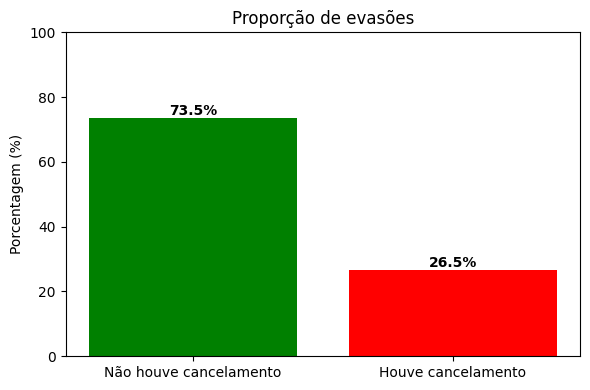

Como a taxa indicada era alta, foi preciso buscar em outras variáveis motivos para tamanha alta em evasões, e como evitá-las. O primeiro passo foi calcular a parte financeira, obtendo os seguintes dados:

# **Média de Gastos**

Média diária em R$: 2.16

Média mensal em R$: 64.72

Média total em R$: 2280.63

# **Perfil dos Clientes**
Neste insight também foi possivel ter um aprofudamento maior no perfil do cliente, sendo que;

51% dos clientes são Homens

49% dos clientes são mulheres

Sendo que 16% do clientes são idosos

48% possuem parceiro(a)

30% possuem dependentes

90% Possuem serviço telefônico

59% utilizam fatura digital

# **Tempo de fidelidade do Cliente**
Neste insight foi possivel calcular qual era o tempo médio de contrato dos clientes. Com esse dado foi possivel observar qual o tempo médio em que o cliente era mais propenso a cancelar o serviço.

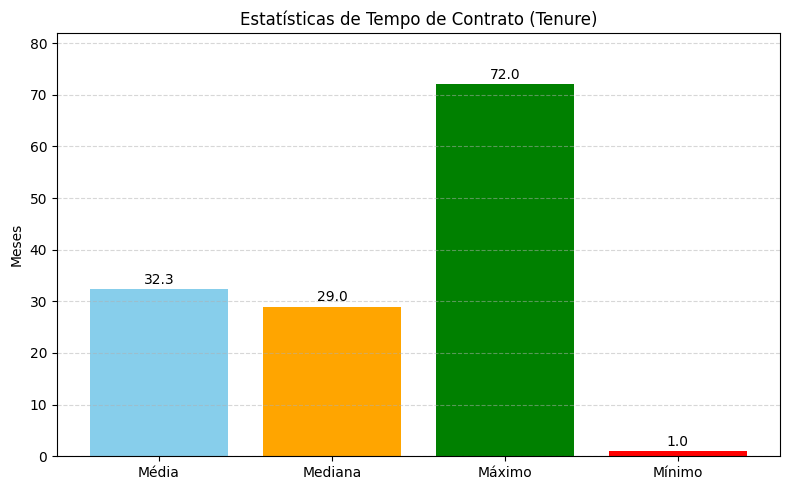

Relação do tempo de contrato e Evasões:
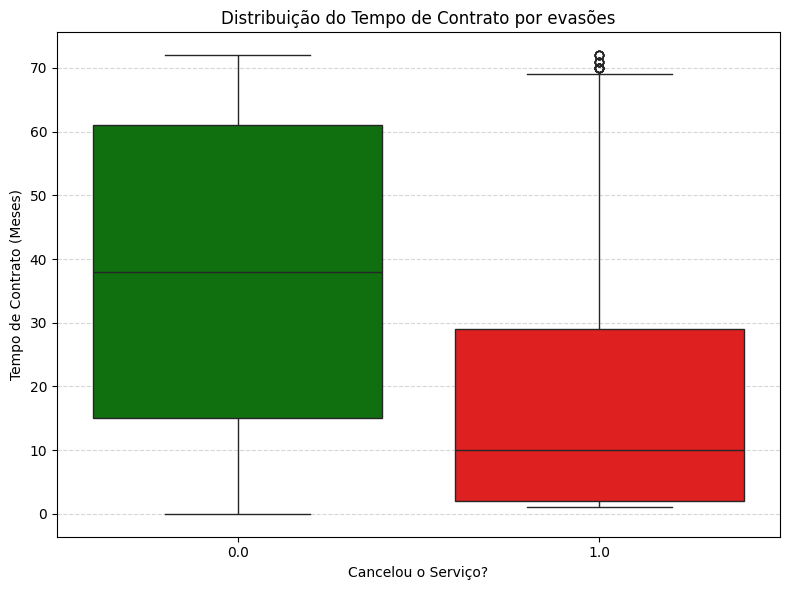

Os dados também possibilitaram uma análise aprofudanda em outras variáveis categóricas como o Gênero, Tipo de contrato, Método de pagamento e Serviço de Internet.

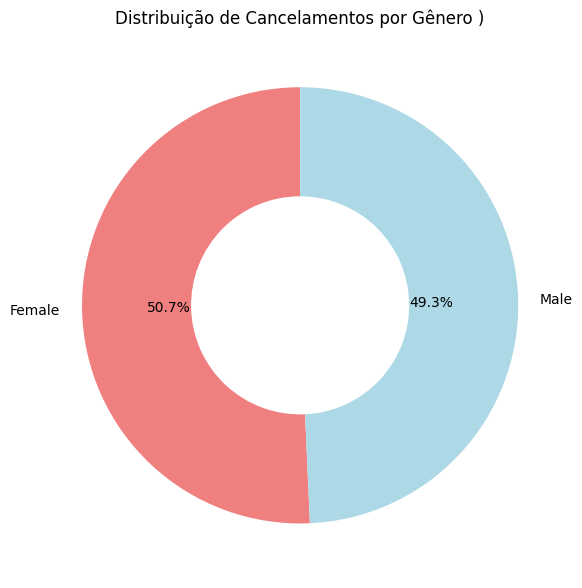

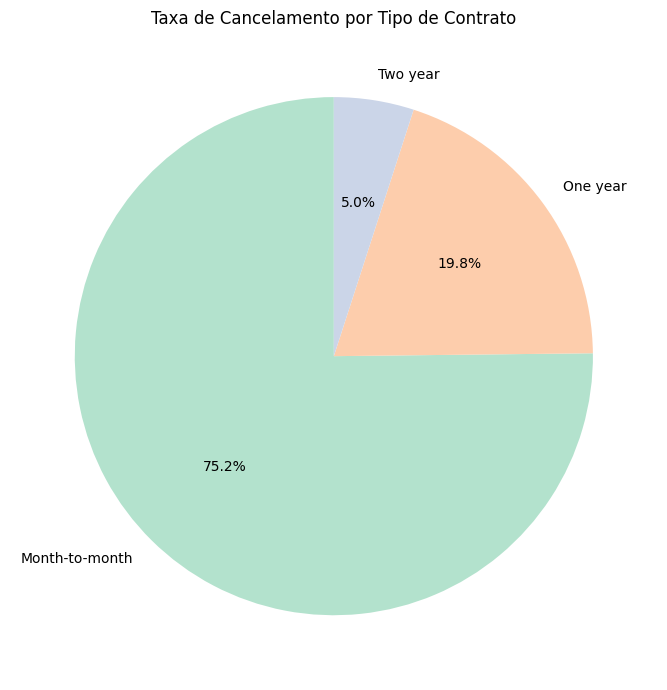


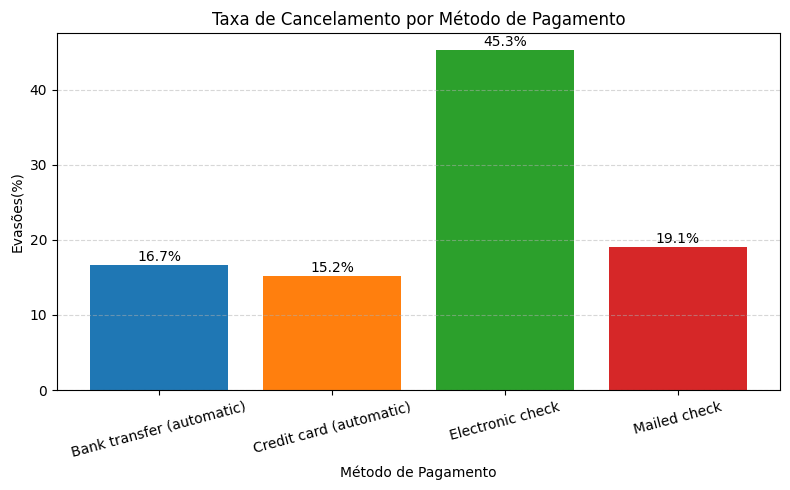


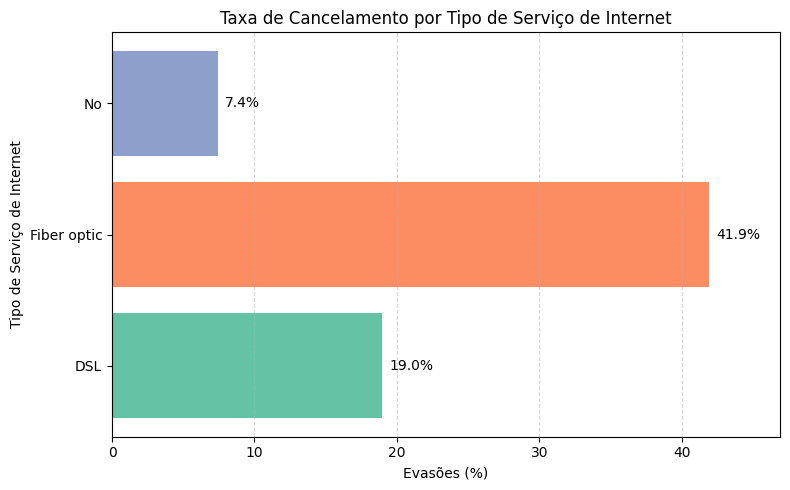

# **Análise de Dados Financeiros**

Após o cálculo da media dos valores diários, mensais e totais das faturas cobradas, obteve-se um dos possiveis fatores predominantes para a alta taxa de evasões, a cobrança mensal. A cobrança mensal teve destaque negativamente nesta categoria.

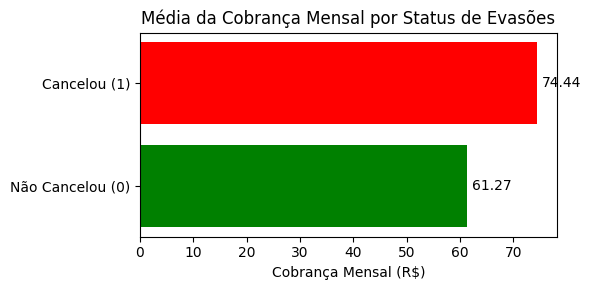

# **Conclusões e Insights**

* Clientes com menos tempo de contrato são mais propensos a cancelar o serviço.
* Clientes com contratos mensais são os que apresentam maior taxa de cancelamentos, sendo o cheque eletrônico o método de pagamento que mais se destaca negativamente.
* Clientes do gênero feminino cancelam mais o serviço
* Clientes que utilizam a Fibra ótica tem um alta taxa de cancelamento, comparado a outros serviços de internet.

# **Recomendações**
*  Na comparação entre o tempo de contrato e as evasões nota-se que os clientes
que mais cancelaram são os que geralmente tem o menor tempo de contrato, indicando uma **necessidade de uma estratégia inicial de retenção para evitar que os novos clientes cancelem o contrato.**

* Revisão da cobrança mensal e incentivo a outros métodos de pagamento diferentes do cheque eletrônico como o débito automático, ou Cartão de Crédito. Como já se trata de um método eletrônico, a troca do cheque por umas destas outras duas opções não alteraria drasticamente a forma de pagamento do cliente. Em último caso, e caso o cliente prefira um pagamento físico, é recomendada a opção de envio por correio.  

* As mulheres têm uma tendência maior em cancelar o serviço. Neste caso, estratégias de marketing direcionadas às mulheres são recomendadas, para assim evitar mais evasões no futuro.

* O serviço de Fibra ótica é o que mais possui cancelamentos nos serviços de Internet. Neste caso, é necessário uma análise aprofundada no modo com o que o serviço está sendo oferecido, e utilizando-se de feedbacks dos clientes, aplicar melhorias neste serviço.

